## 2.3 Supervised Learning- Classification

---

* A. k-Nearest Neighbors: Machine Learning Basics with the K-Nearest Neighbors Algorithm, 
        https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
* B. Linear Regression 
* C. Naive Bayes Classifiers: Naive Bayes Classifier
        https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c <br>
        https://www.geeksforgeeks.org/naive-bayes-classifiers/ 
* D. Decision trees: Decision Trees Explained — Entropy, Information Gain, Gini Index, CCP Pruning
        https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c
* E. Ensembles of Decision Trees: Random Forests, Understanding Random Forest
        https://towardsdatascience.com/understanding-random-forest-58381e0602d2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(f"cancer.keys():{cancer.keys()}\n")
print(f"Shape of cancer data: {cancer.data.shape}\n")
print("Sample counts per class:", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

cancer.keys():dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Shape of cancer data: (569, 30)

Sample counts per class: {'malignant': 212, 'benign': 357}


In [3]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


import plotly.express as px

fig = px.density_contour(data_frame=cancer_df, x='mean smoothness', y=
    'mean radius', z='mean concave points', facet_row=None, facet_col=None,
    )
fig.update_traces(contours_coloring='fill', contours_showlabels=True)
show(fig)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

---

### <font color='blue'>  A. k-Nearest Neighbors: k-Neighbors classification </font>

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 		
 		
Algorithm		
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

\begin{alignat}{1}
\text{Euclidean} \quad D_{eu} = \sqrt{\sum_{i=1}^k (x_i - y_i)^2}  \tag{A.1}
\end{alignat}

\begin{alignat}{1}
\text{Manhattan} \quad D_{ma} = \sum_{i=1}^k | x_i - y_i|  \tag{A.2}
\end{alignat}

\begin{alignat}{1}
\text{Minkowski} \quad D_{mi} = (\sum_{i=1}^k (|x_i - y_i|)^q)^{1/q}  \tag{A.3}
\end{alignat}

This visualization help understand how k-Nearest Neighbors work. Given a k value, what will be the prediction?

In the k=3 circle, green is the majority, new data points will be predicted as green;<br>
In the k=6 circle, blue is the majority, new data points will be predicted as blue;

<div>
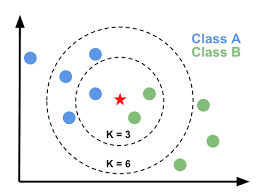
</div>

Advantages: The k-Nearest Neighbors algorithm is simple to implement and robust to noisy training data.

Disadvantages: High cost of computation compared to other algorithms. Storage of data: memory based, so less efficient. Need to define which k value to use.

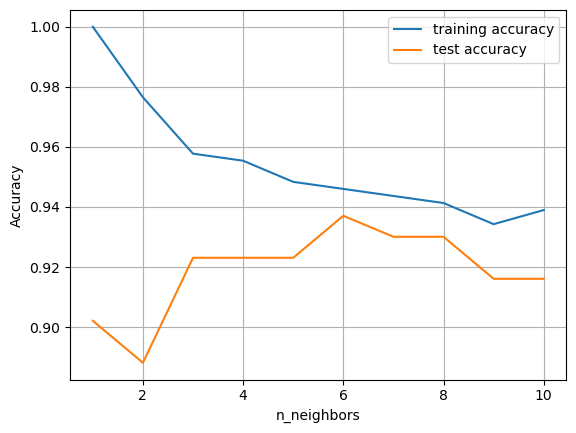

In [5]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
   
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # build the model
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(clf.score(X_test, y_test)) # record generalization accuracy
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.grid();plt.legend()

##### Analyzing KNeighborsClassifier
KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) <br>
    * weights{‘uniform’, ‘distance’} <br>
    * algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}

* Advantages
    * The algorithm is simple and easy to implement.
    * There’s no need to build a model, tune several parameters, or make additional assumptions.
    * The algorithm is versatile. It can be used for classification, regression, and search.

* Disadvantages
    * The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.

---

### <font color='blue'> B.Linear Models: Linear models for regression </font>
Linear Regression cost function $J$
\begin{alignat}{3}
J(\theta) = \text{MSE} (\theta) \triangleq  \frac{1}{2n} \sum_{i=1}^{n} (\theta^T \cdot x^{(i)} - y^{(i)})^2. \tag{B.1}
\end{alignat}

#### Lasso
Lasso Regression cost function
\begin{equation}
\begin{split}
L1: J_{L1}(\theta) &= J(\theta) + \lambda_1 \left\Vert \Theta \right\Vert_1  \\
                &\triangleq \text{MSE} (\theta) + \frac{\lambda_1}{2n} \sum_{j=0}^{p} \lvert \theta_j \rvert \\
                &= \frac{1}{2n} \left[ \sum_{i=1}^{n} (\Theta^T X - y_i)^2 +  \lambda_1 \sum_{j=0}^{p} \lvert \theta_j \rvert \right].
\end{split}\tag{B.2}
\end{equation}

The optimal $\theta_j$ can be derived by minimizing the following: 
\begin{equation}
\frac{\partial {J_{L1}}}{\partial \theta_j} = 
\left\{
\begin{aligned}
\frac{1}{n} \sum_{i=1}^{n} (h(x_i) - y_i)x_i^p + \frac{\lambda_1}{2n}, \text{ for } \theta_j>0 \\
\frac{1}{n} \sum_{i=1}^{n} (h(x_i) - y_i)x_i^p - \frac{\lambda_1}{2n}, \text{ for } \theta_j<0 \\
\end{aligned}
\right.\tag{B.3}
\end{equation} 

#### Ridge regression
Ridge Regression cost function
\begin{equation}
\begin{split}
L2 : J_{L2}(\theta) &= J(\theta) + \lambda_2 \left\Vert \theta \right\Vert_2^2 \\
                      &\triangleq \text{MSE} (\theta) + \frac{\lambda_2}{2n} \sum_{k=0}^{p} \theta_k^2\\ 
                      &= \frac{1}{2n}\left[ \sum_{i=1}^{n} (h(x_i) - y_i)^2 +  \lambda_2 \sum_{k=0}^{p} \theta_k^2 \right].
\end{split}\tag{B.4}
\end{equation}

To find $\theta_k$, we need to derive the minimum value of $J$, by the following:
\begin{equation}
\frac{\partial {J_{L2}}}{\partial \theta_k} = \frac{1}{n} \sum_{i=1}^{n} (h(x_i) - y_i)x_i^p + \frac{\lambda_2}{n}\theta_k
\tag{B.5}
\end{equation} 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [7]:
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score with L2: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score with L2: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score with L2: 0.979
Test set score with L2: 0.944


##### Linear models for classification
* default (penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None) <br>
    *  penalty{‘l1’, ‘l2’, ‘elasticnet’, None}: 
        * None: no penalty is added;
        * 'l2': add a L2 penalty term and it is the default choice;
        * 'l1': add a L1 penalty term;
        * 'elasticnet': both L1 and L2 penalty terms are added.
    * dual: Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
    * tol: Tolerance for stopping criteria.
    * C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    * max_iter, default=100, Maximum number of iterations taken for the solvers to converge.    

In [8]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print("Training set score with L2: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score with L2: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score with L2: 0.986
Test set score with L2: 0.965


In [9]:
logreg001 = LogisticRegression(max_iter=10000,C=0.01).fit(X_train, y_train)
print("Training set score with L2: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score with L2: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score with L2: 0.960
Test set score with L2: 0.937


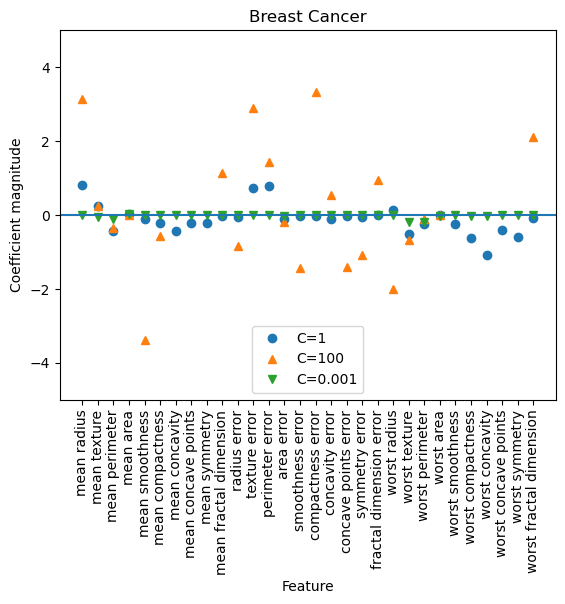

In [10]:
plt.title('Breast Cancer')
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.92
Test accuracy of l1 logreg with C=0.001: 0.90
Training accuracy of l1 logreg with C=1.000: 0.98
Test accuracy of l1 logreg with C=1.000: 0.94
Training accuracy of l1 logreg with C=100.000: 1.00
Test accuracy of l1 logreg with C=100.000: 0.97


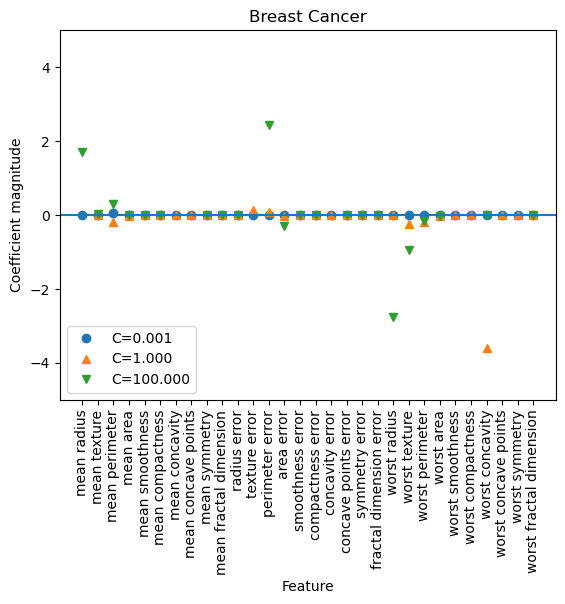

In [11]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(max_iter=10000, C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.title('Breast Cancer')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification

### <font color='blue'> C. Naive Bayes Classifiers </font>
https://www.geeksforgeeks.org/naive-bayes-classifiers/ <br>
* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
    * It is mainly used in text classification that includes a high-dimensional training dataset.
    * Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
    * It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
    * Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

\begin{equation}
p(y|X) = \frac{p(X|y)p(y)}{p(X)}. \tag{C.1}
\end{equation}
where <br>
> $p(y)$: the probability of hypothesis $y$ being true (regardless of the data). This is known as the prior probability of $y$. <br>
> $p(X)$: the probability of the data (regardless of the hypothesis). This is known as the prior probability.<br>
> $p(y|X)$: the probability of hypothesis $y$ given the data $X$. This is known as posterior probability. <br>
> $p(X|y)$: the probability of data $y$ given that the hypothesis $X$ was true. This is known as posterior probability. <br>

<hr style="border:2px solid gray">

A Simple Case study <br>
    If we collect the data of playing ball for 14 days, as follows: 
|No|Outlook	|Temperature	|Humidity|	Windy| 	Play|
|--|-----------|---------------|--------|-------|-------|
|0	|Rainy	|Hot	|High	|False	|No|
|1	|Rainy	|Hot	|High   |True   |No|
|2	|Overcast	|Hot	|High	|False	|Yes|
|3	|Sunny	|Mild	|High	|False	|Yes|
|4	|Sunny	|Cool	|Normal	|False	|Yes|
|5	|Sunny	|Cool	|Normal	|True	|No|
|6	|Overcast	|Cool	|Normal	|True	|Yes|
|7	|Rainy	|Mild	|High	|False	|No|
|8	|Rainy	|Cool	|Normal	|False	|Yes|
|9	|Sunny	|Mild	|Normal	|False	|Yes|
|10	|Rainy	|Mild	|Normal	|True	|Yes|
|11	|Overcast	|Mild	|High	|True	|Yes|
|12	|Overcast	|Hot	|Normal	|False	|Yes|
|13	|Sunny	|Mild	|High	|True	|No|

In [ ]:
If the statical data of playing ball or not (Yes or No) by different outlooks are as follows. <br>
|  Outlook | No | Yes| Prob.   |
|----------|----|----|---------|
| Overcast |   0  |   4 | $p(\text{Overcast}) = \frac{4}{14}$  |
| Sunny    |   2  |   3 | $p(\text{Sunny}) = \frac{5}{14}$ |
| Rainy    |   3  |   2 | $p(\text{Rainy}) = \frac{5}{14}$ |
| Total    |   5  |   9 |  |
|          | $p(\text{No}) = \frac{5}{14}$ | $p(\text{Yes})=\frac{9}{14}$  |  |

We can derive the conditional probabilities. <br>
|  Outlook | No | Yes| Post. Prob. for No | Post. Prob. for Yes |
|----------|----|----|---------|------|
| Overcast |   0  |   4 | $p(\text{Overcast} \rvert \text{No}) = \frac{0}{5}$  | $p(\text{Overcast} \rvert \text{Yes}) = \frac{4}{9}$ |
| Sunny    |   2  |   3 | $p(\text{Sunny} \rvert \text{No}) = \frac{2}{5}$   | $p(\text{Sunny} \rvert \text{Yes}) = \frac{3}{9}$ |
| Rainy    |   3  |   2 | $p(\text{Rainy} \rvert \text{No}) = \frac{3}{5}$  | $p(\text{Rainy} \rvert \text{Yes}) = \frac{2}{9}$ |
| Total    |   5  |   9 |  | |

Therefore, the probabilities of the hypothesis by different outlooks will be 
| Hypothesis | Overcast |  Sunny | Rainy |
|----------|----|----|---------|
| Yes   |  $p(\text{Yes} \rvert \text{Overcast}) = \frac{(4/9) \cdot (9/14)}{4/14} = 1 $  | $p(\text{Yes} \rvert \text{Sunny}) = \frac{(3/9) \cdot (9/14)}{5/14} = \frac{3}{5}$ | |
| No    |  $p(\text{no} \rvert \text{Overcast}) = \frac{(0/5) \cdot (5/14)}{4/14} = 0 $  | $p(\text{No} \rvert \text{Sunny}) =\frac{(2/5) \cdot (5/14)}{5/14} = \frac{2}{5}$ | |

<hr style="border:2px solid gray">

* We assume that no pair of features are dependent. For example, the temperature being ‘Hot’ has nothing to do with the humidity, and the' Rainy' outlook does not affect the winds. Hence, the features are assumed to be independent.
* Secondly, each feature is given the same weight(or importance). For example, knowing only temperature and humidity alone can’t predict the outcome accurately. None of the attributes is irrelevant and assumed to contribute equally to the outcome.
* A naive assumption of the Bayes’ theorem is independence among the features. So now, we split the evidence into independent parts.

Concerning our dataset, we can apply Bayes’ theorem in the following way:<br>
\begin{equation}
\begin{split}
p(y∣X) = p(y | x_1, x_2..,x_p) &= \frac{p(y)p(X∣y)}{p(X)} \\
            &= \frac{p(x_1|y)p(x_2|y)...p(x_p|y)p(y)}{p(x_1)p(x_2)...p(x_p)}\\
            &= \frac{p(y) \prod_{i=1}^p p(x_i|y)}{\prod_{i=1}^p p(x_i)}
\end{split}. \tag{C.2}
\end{equation}
​where, $y$ is class variable and $X$ is a dependent feature vector (of size $p$) where:

Please note that $p(y)$ is also called class probability and $p(x_i​ |y)$ is called conditional probability.

To clear, an example of a feature vector and corresponding class variable can be: (refer to 1st row of the dataset)

$X = $(Rainy, Hot, High, False), $y =$(Yes) 

For example, probability of playing ball given that the temperature is cool, i.e p(temp. = cool | play ball = Yes) = 3/9.

<div style="text-align: center;">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20240417235027/vghbj.png" width="500" alt="Centered Image">
</div>

If we have a new set of features, Today= (Sunny, Hot, Normal, False), so the Yes probability of playing ball will be <br>
\begin{equation}
\begin{split}
p(\text{Yes ∣ Today}) &\propto p(\text{SunnyOutlook| Yes})p(\text{HotTemperature| Yes})p(\text{NormalHumidity| Yes}) p(\text{FalseWind| Yes})p(\text{Yes})\\
            &= \frac{2}{9} \cdot \frac{2}{9} \cdot \frac{6}{9} \cdot \frac{6}{9} \cdot \frac{9}{14} \approx 0.02116
\end{split}. 
\end{equation}

However, the No probability of playing ball will be <br>
\begin{equation}
\begin{split}
p(\text{No ∣ Today}) &\propto p(\text{SunnyOutlook| No})p(\text{HotTemperature| No})p(\text{NormalHumidity| No}) p(\text{FalseWind| No})p(\text{No})\\
            &= \frac{3}{5} \cdot \frac{2}{5} \cdot \frac{1}{5} \cdot \frac{2}{5} \cdot \frac{5}{14} \approx 0.0068
\end{split}
\end{equation}
Because $p(\text{Yes|Today}) > p(\text{No|Today})$; hence, the prediction that ball would be played is ‘Yes’.

Naive Bayes Classification Tutorial using Scikit-learn
https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

In [12]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics

print(f"Gaussian Naive Bayes model: accuracy of cance data (in %): {metrics.accuracy_score(y_test, y_pred)*100:.3f}")

Gaussian Naive Bayes model: accuracy of cance data (in %): 92.308


---

### <font color='blue'> D. Decision trees </font>
* What Is a Decision Tree? <br>
    * Simply speaking, the decision tree algorithm breaks the data points into decision nodes resulting in a tree structure.
    * The decision nodes represent the question based on which the data is split further into two or more child nodes. 
    * The tree is created until the data points at a specific child node is pure (all data belongs to one class). 
    * The criteria for creating the most optimal decision questions is the information gain. 

<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*PB7MYQfzyaLaTp1n" width="400" alt="Centered Image">
</div>
ref <br>
https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96

Hunt’s algorithm, which was developed in the 1960s to model human learning in Psychology, forms the foundation of many popular decision tree algorithms, such as the following: 

- ID3: Ross Quinlan is credited within the development of ID3, which is shorthand for “Iterative Dichotomiser 3.” This algorithm leverages entropy and information gain as metrics to evaluate candidate splits. 

- C4.5: This algorithm is considered a later iteration of ID3, which was also developed by Quinlan. It can use information gain or gain ratios to evaluate split points within the decision trees. 

- CART: The term, CART, is an abbreviation for “classification and regression trees” and was introduced by Leo Breiman. This algorithm typically utilizes Gini impurity to identify the ideal attribute to split on. Gini impurity measures how often a randomly chosen attribute is misclassified. When evaluating using Gini impurity, a lower value is more ideal. 

#### <font color='green'> a. ID3 </font>
In ID3, information gain can be calculated (instead of entropy) for each remaining attribute. The attribute with the largest information gain is used to split the set 
$S$ on this iteration. <br>
Entropy $H(S)$is defined as \begin{equation}
\begin{split}
\text{Entropy}: H(S) = - \sum_{i=1}^{m} p(c_i) \log_2 p(c_i). 
\end{split}\tag{D.1}
\end{equation} 
where <br>
    $S$: the data set that entropy is calculated <br>
    $C=(c_1, c_2,...,c_m)$: the classes in set, <br>
    $p(c_i)$: the proportion of node of the decision tree that belongs to class $c_i$ to the number of total data points in the set, $S$

\begin{equation}
\begin{split}
\text{Information Gain}:g(S, c) = H(S) - \sum_{c \in \text{calues}(C)} \frac{|S_v|}{|S|} H(S_v)
\end{split}. \tag{D.2}
\end{equation} 
where <br>
$c$: a specific attribute or class label <br>
$H(S)$: the entropy of dataset, $S$ <br>
$|S_v|/ |S|$: the proportion of the values in subset $S_v$ to the number of values in dataset, $S$ <br>
$H(S_v)$: the entropy of dataset, $S_v$

If we have a decision tree to classify 7 red-ball and 8 blue-ball by a method such that  
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*WnzSjgaDOUl0388H9B8Kmg.png" width="500" alt="Centered Image">
</div>

\begin{equation}
\text{Information Gain} = \text{Entroy(parent)} -\frac{6}{15} \text{Entropy(child1)} -\frac{9}{15} \text{Entropy(child2)} = 0.279
\end{equation} 

The bigger value of information gain prepresents purity of tree with better classification. 

#### <font color='green'> b. C4.5 </font>

#### <font color='green'> c. CART (Classification and regression tree) </font>
\begin{equation}
\begin{split}
\text{Gini}(c) = 1 - \sum_{i=1}^{m} p(c_i)^2
\end{split}. \tag{D.4}
\end{equation} 
where $p(c_i)$ is the probability of $i$th sample being classified to a particular class $c_i$.

At the same time, we have another decision tree by method 2,  
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:786/format:webp/1*XSUBoMixTercbf798-ozcQ.png" width="500" alt="Centered Image">
</div>
\begin{equation}
\text{Gini} = \frac{6}{15} \text{Gini(child1)} + \frac{9}{15} \text{Gini(child2)} = 0.319
\end{equation} 

#### Homework #1.1 
Please use the example in https://www.ibm.com/topics/decision-trees to find the decision tree of the 14 days' dataset. 

Decision Tree Classification in Python Tutorial
https://www.datacamp.com/tutorial/decision-tree-classification-python

In [24]:
# training the model on the training set
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

cancer_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
cancer_tree.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = cancer_tree.predict(X_test)

print(f"Decision Tree Classifier accuracy of cancer data (in %): {metrics.accuracy_score(y_test, y_pred)*100:.3f}")

Decision Tree Classifier accuracy of cancer data (in %): 93.007


In [25]:
len(cancer.feature_names)

30

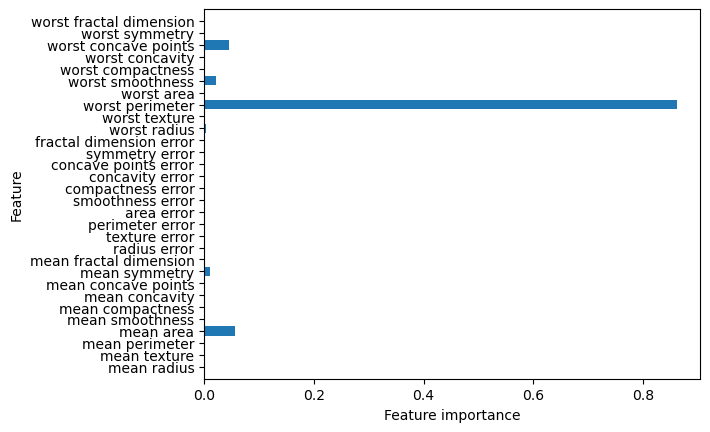

In [26]:
def plot_feature_importances(n_features, feature_names, model):
    n_features = len(feature_names)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(cancer.data.shape[1], cancer.feature_names, cancer_tree)

* Training a machine learning model using a decision tree classification algorithm is about finding the decision tree boundaries.
    * Decision trees build complex decision boundaries by dividing the feature space into rectangles. 
    * Here is a sample of how decision boundaries look like after model trained using a decision tree algorithm classifies the Sklearn IRIS data points. 
    * The feature space consists of two features namely petal length and petal width. 

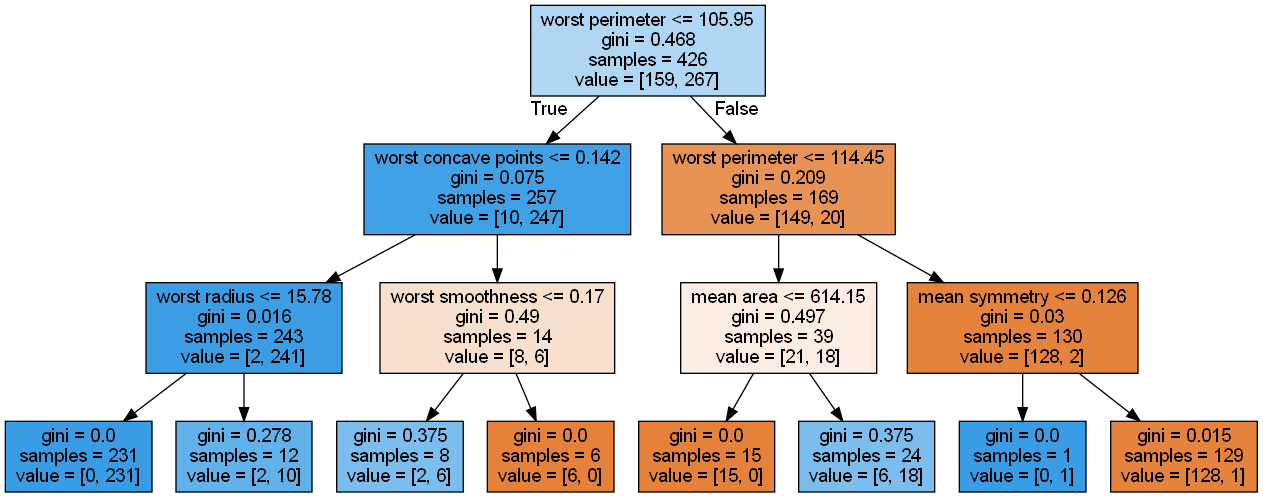

In [27]:
#from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

dot_data = export_graphviz(cancer_tree, out_file=None, feature_names=cancer.feature_names, filled=True)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

---

### <font color='blue'> E. Ensembles of Decision Trees: Random forests </font>
* Random forest falls under the supervised learning techniques in machine learning and it is certainly one of the most popular algorithms used for regression and classification purposes. 
    * The Random Forest algorithm is based on ensembling learning, which means stacking together a lot of classifiers to improve performance. 
    * Simply put, a random forest is a group of decision trees (CART based on Gini) and takes the majority of the outputs of the decision trees to improve the prediction and results

Random Forest Classification with Scikit-Learn 
https://www.datacamp.com/tutorial/random-forests-classifier-python

The random forest algorithm can be represented mathematically as:

\begin{equation}
\begin{split}
RF = \text{argmax}_{j\in{(1,2,...,N)}} \sum_{i=1}^{i} \text{Decision Tree-}{i,j}
\end{split}. \tag{E.1}
\end{equation} 

Where class $j$ refers to the classes in the data and $i$ refers to the number of decision trees from 1 up to the ith example. <br>
Argmax refers to the maximum value of the function, in other words, the majority voting.

#### Ensemble methods
* The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
* Two families of ensemble methods are usually distinguished:
    * In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Examples: Bagging methods, Forests of randomized trees, …
    * By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. 
    * The motivation is to combine several weak models to produce a powerful ensemble.

#### Implementation Steps of Bagging

> Step 1: Multiple subsets are created from the original data set with equal tuples, selecting observations with replacement.<br>
> Step 2: A base model is created on these subsets.<br> 
> Step 3: Each model is learned in parallel with each training set and independent of each other. <br>
> Step 4: The final predictions are determined by combining the predictions from all the models.

<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" width="500"/>
</div>

#### Implementation Steps of Boosting
> Step 1: Initialise the dataset and assign equal weight to each data point.<br>
> Step 2 Provide this as input to the model and identify the wrongly classified data points.<br>
> Step 3: Increase the weight of the wrongly classified data points and decrease the weight of correctly classified data points. And then normalize the weights of all data points.<br>
> Step 4: if (got required results) Goto step 5 else,  Goto step 2 <br>
> Step 5: End

<div>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140911/Boosting.png" width="500"/>
</div>

#### Similarities Between Bagging and Boosting
Bagging and Boosting, both being the commonly used methods, have a universal similarity of being classified as ensemble methods. Here we will explain the similarities between them.

* Both are ensemble methods to get N learners from 1 learner.
* Both generate several training data sets by random sampling.
* Both make the final decision by averaging the N learners (or taking the majority of them i.e Majority Voting).
* Both are good at reducing variance and provide higher stability

#### Differences Between Bagging and Boosting
| No | Bagging | Boosting  | 
|----|---|----|
| 1 | Same predictions | Different predictions | 
| 2 | decrease variance |  decrease bias | 
| 3 | Each model receives equal weight. | Models are weighted according to their performance  | 
| 4 | Each model is built independently | Previous models' performance influences new models. | 
| 5 | Different training data subsets are selected using row sampling with replacement and random sampling methods from the entire training dataset | Iteratively train models, with each new model focusing on correcting the errors (misclassifications or high residuals) of the previous models  | 
| 6 | Bagging tries to solve the over-fitting problem. | Boosting tries to reduce bias.  | 
| 7 | Example: The Random forest model uses Bagging. | Example: The AdaBoost uses Boosting techniques  | 

#### A typical Random Forest = Bagging + Decision Tree

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


#### An enhanced RF: Gradient Boosted Regression Trees (Gradient Boosting Machines)
* Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. 
    * GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in various areas, including Web search ranking and ecology.
    * The module sklearn.ensemble provides methods for both classification and regression via gradient-boosted decision trees.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, random_state=0)

cancer_gbc = GradientBoostingClassifier(random_state=0)
cancer_gbc.fit(X_train, y_train)

print(f"Accuracy on training set: {cancer_gbc.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {cancer_gbc.score(X_test, y_test):.3f}")

Accuracy on training set: 1.000
Accuracy on test set: 0.965


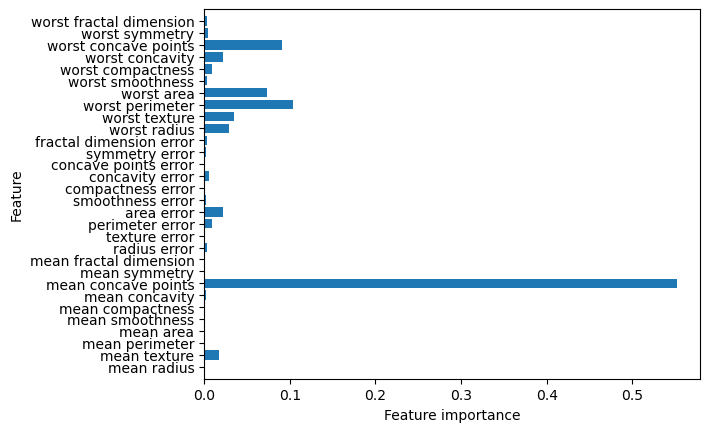

In [19]:
plot_feature_importances(cancer.data.shape[1], cancer.feature_names, cancer_gbc)

In [20]:
cancer_gbc = GradientBoostingClassifier(random_state=0, max_depth=1)
cancer_gbc.fit(X_train, y_train)

print(f"Accuracy on training set: {cancer_gbc.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {cancer_gbc.score(X_test, y_test):.3f}")

Accuracy on training set: 0.991
Accuracy on test set: 0.972


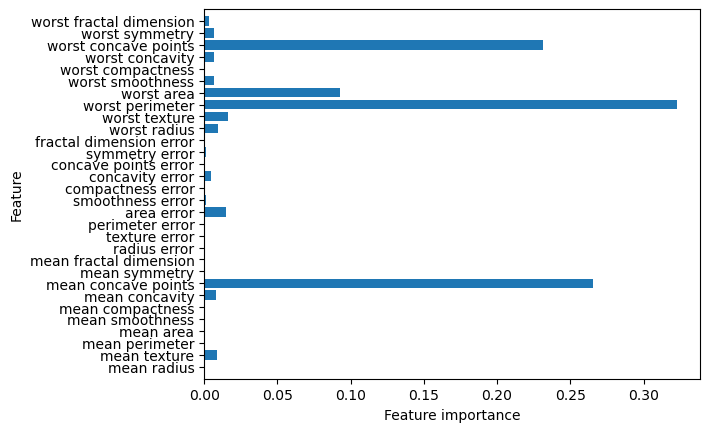

In [21]:
plot_feature_importances(cancer.data.shape[1], cancer.feature_names, cancer_gbc)

In [22]:
cancer_gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
cancer_gbc.fit(X_train, y_train)

print(f"Accuracy on training set: {cancer_gbc.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {cancer_gbc.score(X_test, y_test):.3f}")

Accuracy on training set: 0.988
Accuracy on test set: 0.958


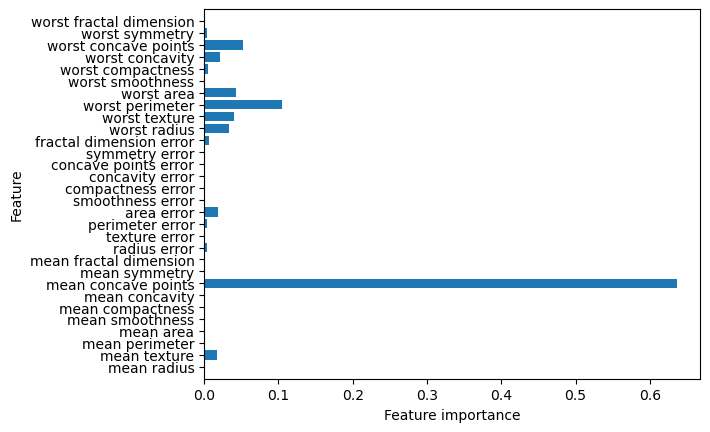

In [23]:
plot_feature_importances(cancer.data.shape[1], cancer.feature_names, cancer_gbc)

---

#### Homework #1.2
Please compare the performances of the following models, eg. k-neighbors regression, LogisticRegression, GradientBoostingClassifier, and RandomForestClassifier, using the data. https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability